Course project part 1: Loading and Reading Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/student_attendance.csv')
dataset

,Weather,Temperature,Attendance
0,Sunny,5.780964,Present
1,Snowy,10.639905,Absent
2,Rainy,18.034428,Present
3,Sunny,14.250122,Present
4,Snowy,27.504825,Absent
...,...,...,...
9995,Cloudy,21.344979,Present
9996,Rainy,6.315741,Present
9997,Cloudy,20.471348,Absent
9998,Snowy,20.774593,Absent


In [ ]:
#We all know the weather can  have an impact on peoples’ plans, mood and overall day. As a student, It will be interesting to see the correlation of the overall effect  of the weather towards other students to me.



In [ ]:
# 1) Display the first few rows
#dataset[ :5]
dataset.head()

,Weather,Temperature,Attendance
0,Sunny,5.780964,Present
1,Snowy,10.639905,Absent
2,Rainy,18.034428,Present
3,Sunny,14.250122,Present
4,Snowy,27.504825,Absent


In [ ]:
# 2) Display the last 5 rows of your dataset
#dataset[-5:]
dataset.tail()

,Weather,Temperature,Attendance
9995,Cloudy,21.344979,Present
9996,Rainy,6.315741,Present
9997,Cloudy,20.471348,Absent
9998,Snowy,20.774593,Absent
9999,Sunny,22.506716,Present


In [ ]:
# 3) get a summary of your dataset
#dataset.describe()


In [ ]:
# 4) display basic infromation about the dataset
#dataset.info()

In [ ]:
# 5) Display the column names of the datatset
#dataset[-1: -6]

In [ ]:
# 6) Determine if there are any missing values
#dataset.isnull().values.any()

In [ ]:
#7) Display the dataset showing only the 3-4 most important columns from your dataset
#dataset.style.hide_index()

In [ ]:
#8) Determine if there are any missing values from the columns you selected in 7

#dataset.isnull().sum()

In [ ]:
# 9) Display the rows that contain the missing values determined from 8
# I'm not sure how to do this one

Course Project part 2: Data Cleaning and Preparation

1.HANDLING MISSING VALUES

In [ ]:
#conduct a thorough data quality check
missing_values=dataset.isnull().sum() # No Missing values !!
print(missing_values)
print(missing_values.sum())

Weather                          0
Temperature                      0
Attendance                       0
Temp in F                        0
Ranking of Temperature Values    0
dtype: int64
0


In [ ]:
#Visualizing ouliers or anomalies using histogram
import matplotlib.pyplot as plt


In [ ]:
import numpy as np

In [ ]:
data= np.random.randn(10000) # generates data up to 10000 for distribution

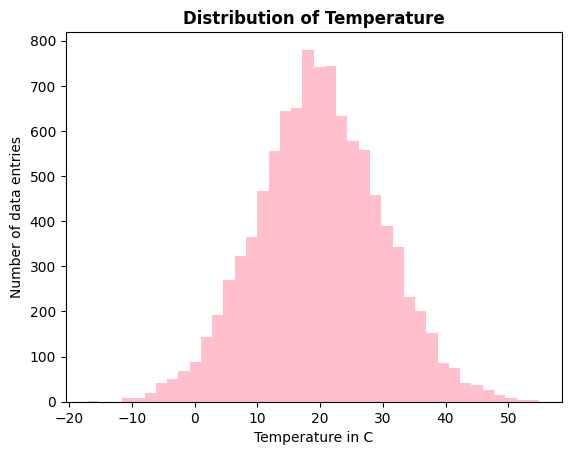

In [ ]:
plt.hist( dataset['Temperature'], bins= 40, color='pink')
plt.xlabel('Temperature in C')
plt.ylabel( 'Number of data entries')
plt.title('Distribution of Temperature', weight= 'bold')
plt.show()

Medium of Temperature is around 20 degrees Celcius ( 68 degrees Fahrenheit)

there is an outlier around -20 and -15 degrees. Also after 50 degrees

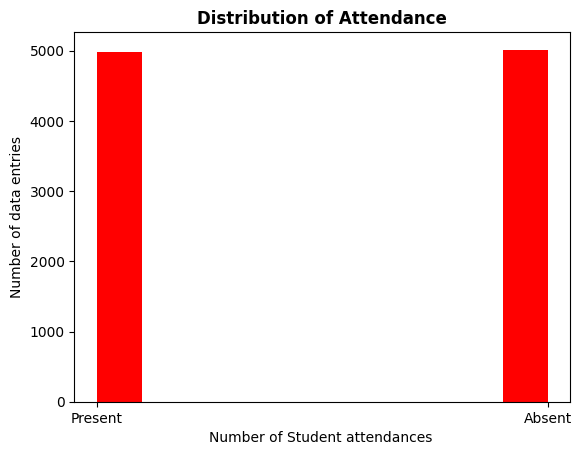

In [ ]:
plt.hist(dataset['Attendance'], bins=10 , color= 'red')
plt.xlabel('Number of Student attendances ')
plt.ylabel( 'Number of data entries')
plt.title('Distribution of Attendance', weight= 'bold')
plt.show()

There is as much present students as absent. However it doesn't show the specfic number of present/absent students.

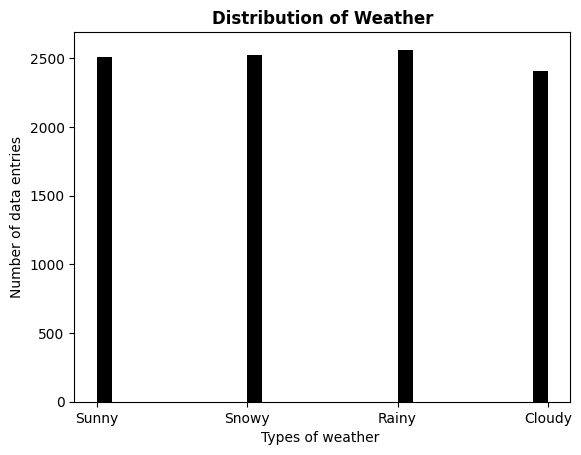

In [ ]:
plt.hist(dataset['Weather'], bins=30 , color= 'black')
plt.xlabel('Types of weather ')
plt.ylabel( 'Number of data entries')
plt.title('Distribution of Weather', weight= 'bold')
plt.show()

Sunny, Snowy and Rainy weathers are shown the most


In [ ]:
#IDENTIFYING OUTLIERS FOR THE TEMPERATURE
dataset.describe()

,Temperature
count,10000.000000
mean,19.886669
std,9.960585
min,-16.942853
25%,13.252894
50%,19.733000
75%,26.582097
max,54.915504


In [ ]:
Q1= dataset['Temperature'].quantile(0.25)
Q3= dataset['Temperature'].quantile(0.75)
IQR= Q3-Q1

In [ ]:
threshold= 1.5
outliers= dataset[(dataset['Temperature']< Q1 - threshold * IQR) | (dataset['Temperature'] > Q3 + threshold)]
print(outliers)

     Weather  Temperature Attendance
12     Sunny    28.609733    Present
15     Sunny    34.288924    Present
16     Sunny    30.061017    Present
19     Rainy    41.120196     Absent
22     Snowy    33.649390     Absent
...      ...          ...        ...
9976   Snowy    29.913379    Present
9978  Cloudy    31.207610     Absent
9985   Sunny    41.448389    Present
9986  Cloudy    35.178095     Absent
9988   Rainy    32.383539    Present

[2064 rows x 3 columns]


In [ ]:
# Replace values with mean, median or constant

median=float(dataset['Temperature'].median())
#dataset['Temperature']=np.where(dataset['Temperature'] > median, median , dataset['Temperature'])

In [ ]:
dataset.median()


<ipython-input-13-e22d0dc743ec>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.median()


Temperature    19.733
dtype: float64

In [ ]:
#drop rows with outliers
outliers_dropped= outliers.dropna().reset_index()
outliers_dropped

,index,Weather,Temperature,Attendance
0,12,Sunny,28.609733,Present
1,15,Sunny,34.288924,Present
2,16,Sunny,30.061017,Present
3,19,Rainy,41.120196,Absent
4,22,Snowy,33.649390,Absent
...,...,...,...,...
2059,9976,Snowy,29.913379,Present
2060,9978,Cloudy,31.207610,Absent
2061,9985,Sunny,41.448389,Present
2062,9986,Cloudy,35.178095,Absent


In [ ]:
dataset= outliers_dropped
dataset

,index,Weather,Temperature,Attendance
0,12,Sunny,28.609733,Present
1,15,Sunny,34.288924,Present
2,16,Sunny,30.061017,Present
3,19,Rainy,41.120196,Absent
4,22,Snowy,33.649390,Absent
...,...,...,...,...
2059,9976,Snowy,29.913379,Present
2060,9978,Cloudy,31.207610,Absent
2061,9985,Sunny,41.448389,Present
2062,9986,Cloudy,35.178095,Absent


Explain how you would address these data quality issues of they were present

If they were present I would use the fillna function to fill nan values

2. COLUMN MANIPULATION

In [ ]:
#Develop a new column derived from existing columns (e.g., a calculated value, mapping of values)

dataset['Temp in F']= dataset['Temperature']
dataset

,Weather,Temperature,Attendance,Temp in F
0,Sunny,5.780964,Present,5.780964
1,Snowy,10.639905,Absent,10.639905
2,Rainy,18.034428,Present,18.034428
3,Sunny,14.250122,Present,14.250122
4,Snowy,27.504825,Absent,27.504825
...,...,...,...,...
9995,Cloudy,21.344979,Present,21.344979
9996,Rainy,6.315741,Present,6.315741
9997,Cloudy,20.471348,Absent,20.471348
9998,Snowy,20.774593,Absent,20.774593


In [ ]:
mask= dataset['Temp in F']== 'Temp in F'
dataset.loc[mask, 'Temp in F']== ((1.8) + 32)

dataset['Temp in F '].replace(round( *1.8) + 32)


In [ ]:
#Develop another new column for ranking of values from one of the chosen columns.
dataset['Ranking of Temperature Values']= dataset['Temperature']
dataset

,Weather,Temperature,Attendance,Temp in F,Ranking of Temperature Values
0,Sunny,5.780964,Present,5.780964,5.780964
1,Snowy,10.639905,Absent,10.639905,10.639905
2,Rainy,18.034428,Present,18.034428,18.034428
3,Sunny,14.250122,Present,14.250122,14.250122
4,Snowy,27.504825,Absent,27.504825,27.504825
...,...,...,...,...,...
9995,Cloudy,21.344979,Present,21.344979,21.344979
9996,Rainy,6.315741,Present,6.315741,6.315741
9997,Cloudy,20.471348,Absent,20.471348,20.471348
9998,Snowy,20.774593,Absent,20.774593,20.774593


In [ ]:
#Clearly document your decisions and reasoning behind handling missing data

Explain the rationale behind creating this new column.

3. FILTERING DATA

In [ ]:
#Implement filters to display rows based on specific criteria (e.g., rows where a column's value exceeds a set threshold).
filtered_dataset2=dataset.query(" Weather != 'Rainy' ")
filtered_dataset3=dataset.query(" Attendance == 'Absent' ")


In [ ]:
print(filtered_dataset2)

     Weather  Temperature Attendance  Temp in F  Ranking of Temperature Values
0      Sunny     5.780964    Present   5.780964                       5.780964
1      Snowy    10.639905     Absent  10.639905                      10.639905
3      Sunny    14.250122    Present  14.250122                      14.250122
4      Snowy    27.504825     Absent  27.504825                      27.504825
5      Snowy    12.355980     Absent  12.355980                      12.355980
...      ...          ...        ...        ...                            ...
9994   Snowy    18.484870     Absent  18.484870                      18.484870
9995  Cloudy    21.344979    Present  21.344979                      21.344979
9997  Cloudy    20.471348     Absent  20.471348                      20.471348
9998   Snowy    20.774593     Absent  20.774593                      20.774593
9999   Sunny    22.506716    Present  22.506716                      22.506716

[7438 rows x 5 columns]


In [ ]:
print(filtered_dataset3)

     Weather  Temperature Attendance  Temp in F  Ranking of Temperature Values
1      Snowy    10.639905     Absent  10.639905                      10.639905
4      Snowy    27.504825     Absent  27.504825                      27.504825
5      Snowy    12.355980     Absent  12.355980                      12.355980
6      Snowy    10.328729     Absent  10.328729                      10.328729
8      Rainy    24.066572     Absent  24.066572                      24.066572
...      ...          ...        ...        ...                            ...
9991   Snowy     3.999599     Absent   3.999599                       3.999599
9993  Cloudy    18.492121     Absent  18.492121                      18.492121
9994   Snowy    18.484870     Absent  18.484870                      18.484870
9997  Cloudy    20.471348     Absent  20.471348                      20.471348
9998   Snowy    20.774593     Absent  20.774593                      20.774593

[5015 rows x 5 columns]


4.DATA SORTING

In [ ]:
#Organize your dataset by sorting based on one or more columns
sorted_temp = dataset.sort_values(['Ranking of Temperature Values'])
sorted_temp

,Weather,Temperature,Attendance,Temp in F,Ranking of Temperature Values
9861,Snowy,-16.942853,Present,-16.942853,-16.942853
7327,Sunny,-15.971633,Absent,-15.971633,-15.971633
3478,Cloudy,-11.262015,Absent,-11.262015,-11.262015
2773,Rainy,-10.692068,Present,-10.692068,-10.692068
7588,Sunny,-10.219933,Present,-10.219933,-10.219933
...,...,...,...,...,...
6287,Snowy,52.205018,Absent,52.205018,52.205018
3328,Sunny,52.926943,Present,52.926943,52.926943
8915,Rainy,53.795401,Absent,53.795401,53.795401
6812,Sunny,54.571789,Present,54.571789,54.571789


In [ ]:
#Provide an explanation for your choice of columns for sorting.